# COGS 118B - Final Project

# BOOK Recommender system

## Group members

- Xunzhi He
- Cassidy Lu
- William Zhao
- Huiyi He

# Abstract 
Our project aims to develop a genre-specific book recommendation system for the Goodreads websites platform by applying users' ebook shelf data collected from Julian McAuley’s lab datasets. The dataset can be easily scraped from the public Goodreads website. By categorizing users' information using clustering methods like K-means and Gaussian Mixture Models (GMM), we aim to enhance the accuracy of genre-based book recommendations. The performance of our recommendation system will be assessed through using performance metrics such as the adjusted Rand index. Additionally, we will employ visualization methods such as silhouette plots to provide deeper insights into the clustering algorithms' performance and the overall quality of generated recommendations. 


# Background

The utilization of recommendation systems (RS) has become increasingly prevalent across diverse platforms such as Netflix, Spotify, and e-commerce portals like Amazon and eBay. These intelligent computer-based techniques can analyze user preferences to predict users’ preferences and provide suggestions for items that may interest them, thereby enhancing user experience and achieving business benefits. For instance, Spotify can smartly curate playlists based on users' listening history and personal playlists, while e-commerce platforms recommend products tailored to individual preferences which could potentially increase customers’ desire to purchase certain products<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). 

RS systems have evolved from the earliest algorithms like Grundy, which allow users to query for items in an online information domain, to complex models applying advanced machine learning techniques. These systems use various recommendation approaches, such as content-based filtering and demographic segmentation<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote), to create personalized suggestions for users. Content-based recommender systems, for instance, analyze users' historical data to recommend items similar to their past preferences. Demographic recommendation systems utilize demographic profiles to personalize recommendations.

However, despite the advancements in RS systems, there are still some limits that persist in current recommendation systems. Traditional recommender systems might suffer the problem of poor scalability, data sparsity, and recommending similar items repeatedly<a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). Our project is considered a content-based recommender system and we will analyze users’ ebook shelves data on the Goodreads website. We will apply several appropriate clustering methods such as the K-Means algorithm, and Gaussian Mixture Models (GMM) in developing high-quality recommendation systems that determine similarities to define a people group to build a book recommender system for users. Through the integration of advanced machine learning algorithms, our system will provide more accurate and diverse recommendations, thereby enhancing user experience on the Goodreads platform.

# Problem Statement

We aim to optimize the book discovery process by designing a personalized book recommendation system. This system addresses the significant challenge readers encounter when navigating the extensive selection of books across diverse genres and authors. Utilizing clustering algorithms such as K-means for our baseline model and Gaussian Mixture Models (GMM) for an advanced approach, we intend to categorize books into clusters $C_i$ based on features $F = \{f_1, f_2, \ldots, f_n\}$, which include genre, authorship, reader ratings, and descriptions. The strategy is directed at minimizing the search effort for users by aligning recommendations with their preferences and reading history. The effectiveness of our system is quantitatively measured through metrics such as precision $\frac{TP}{TP + FP}$, recall $\frac{TP}{TP + FN}$, and the F1 score $2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}$, where $TP$, $FP$, and $FN$ represent true positives, false positives, and false negatives, respectively.

The system's performance is further measurable through engagement metrics such as click-through rate (CTR) $= \frac{\text{Number of clicks}}{\text{Number of recommendations shown}}$, conversion rate $= \frac{\text{Number of conversions}}{\text{Total interactions}}$, and user satisfaction scores, providing objective measures of how well the recommendations correspond to user preferences. This problem's replicability across various demographics, platforms, and databases underscores its ubiquity in improving user experiences in digital book ecosystems.

By systematically collecting and analyzing user data $D = \{d_1, d_2, \ldots, d_m\}$ regarding reading habits, ratings, and preferences, we can iteratively refine our models to ensure that the recommendations $R$ remain pertinent and captivating for a broad audience over time, employing statistical and machine learning techniques to adapt and evolve the recommendation system in response to changing user behaviors and preferences.

# Data

We would like to use total of two dataset to create a recommendation system of books for the users.
Information regarding data:
- link of the data: https://mengtingwan.github.io/data/goodreads#datasets<a name="data_ref1"></a>[<sup>[4]</sup>](#cite_note-1)<a name="data_ref2"></a>[<sup>[5]</sup>](#cite_note-1)
- The first file we use as our dataset is goodreads_book_genres_initial.json.gz file containing all the book information for the goodreads website. It has total of 2360655 rows and 2 columns: book_id and genres. Each of the row correspond to one book. The book_id is a string of numbers which each of the id is unique in this dataframe. The column genres is a dictionary where the key is a string of genre and the value is an integer which is unknow for us what the integer represent since the dataset description did not specify what the integer represent.
- The second file is goodreads_interactions.csv file containing the reader information. It has total of 228648342 rows and 5 columns. The first column is user_id where each unique user has one unqiue id using a string of numbers to represent. The second column is book_id which will match the book_id from the first goodreads_book_genres's book_id. The third column is_read contain a boolean value 1 and 0. 1 represent the reader is currently reading the book and 0 otherwise. The 4th column rating uses an integer from range 0-5 to represent the user rating of a book. The last column is_reviewed also contain a boolean value 1 and 0. 1 represent the reader have left a review for this book and 0 otherwise.
- We will preform some special handling for both of the data. Since both data are huge and in order to prevent dead kernel while cleaning the dataframe and training the model, we have reduce the size of the goodreads_book_genres dataframe to 800000 books. We have also reduced the size of goodreads_interactions.csv to the first 200000 rows. We would merge those two dataframe using left mrege using book_id columns by merging on to the user dataframe(goodreads_interactions.csv). We would then filter out all the np.nan values in the dataframe by deleting the row that contains any np.nan values. For the rating column, we might want to standardize it to see if there are user giving extremly high or low rating. We would then change the genres into a list of strings representing the genre the book belongs in. Later we would use MultiLabelBinarizer from sklearn to one-hot encode the genre list for each book. We would also groupby the dataframe by user_id and standardize the number of book the read for each genre.



## Preprocessing

In [1]:
# imports
import pandas as pd
import numpy as np
import json
import gzip 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import ML packages
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# file path for Karl
# base_path = "C:/Users/karl2/Downloads/"
# base_path = "/Desktop/cogs118B/data/"

In [3]:
# load in json file  
with gzip.open('goodreads_book_genres_initial.json.gz', 'rt', encoding = 'utf-8') as f:
    df = pd.read_json(f, lines = True)

In [4]:
# load in csv file with first 200000 row 
user_df = pd.read_csv('goodreads_interactions.csv',nrows=200000)
user_df

,user_id,book_id,is_read,rating,is_reviewed
0,0,948,1,5,0
1,0,947,1,5,1
2,0,946,1,5,0
3,0,945,1,5,0
4,0,944,1,5,0
...,...,...,...,...,...
199995,437,51332,0,0,0
199996,437,51329,0,0,0
199997,437,98589,0,0,0
199998,437,98588,0,0,0


In [5]:
# only include 800000 books
book_df = df.sample(800000, random_state=1)
book_df

,book_id,genres
1479845,6884978,{}
2032903,6070478,"{'history, historical fiction, biography': 8, ..."
1406890,6343285,{}
183904,17058517,{'non-fiction': 23}
425144,34284404,{}
...,...,...
686872,24840238,"{'non-fiction': 20, 'fiction': 3, 'history, hi..."
45306,32128623,{'children': 4}
1254359,35174758,"{'comics, graphic': 42}"
2183803,19166163,"{'fantasy, paranormal': 1, 'romance': 1}"


In [6]:
# clean the genres to list 
book_df['genres_lst'] = book_df['genres'].apply(lambda x: list(x.keys()))
book_df = book_df[book_df['genres_lst'].str.len() != 0]
book_df

,book_id,genres,genres_lst
2032903,6070478,"{'history, historical fiction, biography': 8, ...","[history, historical fiction, biography, child..."
183904,17058517,{'non-fiction': 23},[non-fiction]
1584276,6885606,"{'romance': 4, 'fiction': 1}","[romance, fiction]"
636742,10961964,"{'history, historical fiction, biography': 265...","[history, historical fiction, biography, roman..."
234337,260335,"{'non-fiction': 2, 'history, historical fictio...","[non-fiction, history, historical fiction, bio..."
...,...,...,...
686872,24840238,"{'non-fiction': 20, 'fiction': 3, 'history, hi...","[non-fiction, fiction, history, historical fic..."
45306,32128623,{'children': 4},[children]
1254359,35174758,"{'comics, graphic': 42}","[comics, graphic]"
2183803,19166163,"{'fantasy, paranormal': 1, 'romance': 1}","[fantasy, paranormal, romance]"


In [7]:
# merge book and users to merged_df
merged_df = user_df.merge(book_df, how = 'left', left_on = 'book_id', right_on = 'book_id').dropna()

In [8]:
# check if there are any np.nan value left 
merged_df.isna().all()

user_id        False
book_id        False
is_read        False
rating         False
is_reviewed    False
genres         False
genres_lst     False
dtype: bool

In [9]:
merged_df

,user_id,book_id,is_read,rating,is_reviewed,genres,genres_lst
6,0,942,1,5,0,"{'non-fiction': 199, 'children': 33}","[non-fiction, children]"
15,0,933,1,4,0,"{'fiction': 17490, 'history, historical fictio...","[fiction, history, historical fiction, biograp..."
17,0,931,1,5,0,"{'fiction': 17490, 'history, historical fictio...","[fiction, history, historical fiction, biograp..."
33,0,915,1,5,1,"{'mystery, thriller, crime': 273, 'fiction': 94}","[mystery, thriller, crime, fiction]"
35,0,913,0,0,1,"{'non-fiction': 1466, 'fiction': 26, 'history,...","[non-fiction, fiction, history, historical fic..."
...,...,...,...,...,...,...,...
199977,437,44789,0,0,0,"{'non-fiction': 9, 'history, historical fictio...","[non-fiction, history, historical fiction, bio..."
199987,437,51331,0,0,0,"{'history, historical fiction, biography': 1}","[history, historical fiction, biography]"
199991,437,98592,0,0,0,"{'non-fiction': 74, 'fiction': 3, 'history, hi...","[non-fiction, fiction, history, historical fic..."
199995,437,51332,0,0,0,"{'non-fiction': 235, 'history, historical fict...","[non-fiction, history, historical fiction, bio..."


## EDA

In [10]:
df = merged_df
general_stats = df.describe()

ratings_distribution = df[df['is_read'] == 1]['rating'].value_counts().sort_index()

general_stats, ratings_distribution

(            user_id       book_id       is_read        rating   is_reviewed
 count  29859.000000  29859.000000  29859.000000  29859.000000  29859.000000
 mean     221.035634  31098.412238      0.514384      1.892897      0.084095
 std      133.453416  28128.206487      0.499801      2.055101      0.277535
 min        0.000000      1.000000      0.000000      0.000000      0.000000
 25%      112.000000   7351.000000      0.000000      0.000000      0.000000
 50%      220.000000  20751.000000      1.000000      0.000000      0.000000
 75%      338.000000  50452.000000      1.000000      4.000000      0.000000
 max      437.000000  99500.000000      1.000000      5.000000      1.000000,
 rating
 0     848
 1     219
 2     844
 3    3469
 4    5689
 5    4290
 Name: count, dtype: int64)

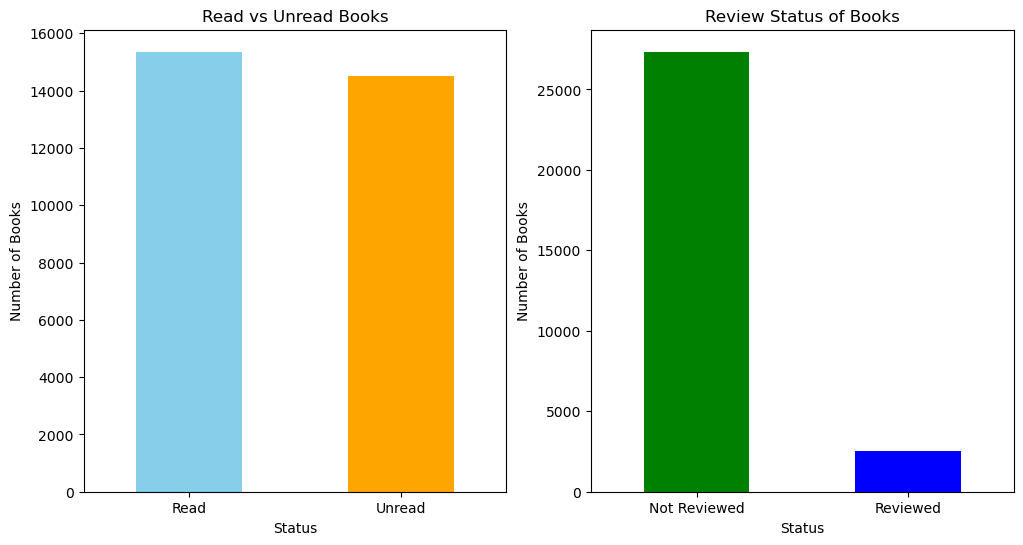

In [11]:
read_unread_distribution = df['is_read'].value_counts()
review_status_distribution = df['is_reviewed'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
read_unread_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Read vs Unread Books')
plt.xticks(ticks=[0, 1], labels=['Read', 'Unread'], rotation=0)
plt.xlabel('Status')
plt.ylabel('Number of Books')

plt.subplot(1, 2, 2)
review_status_distribution.plot(kind='bar', color=['green', 'blue'])
plt.title('Review Status of Books')
plt.xticks(ticks=[0, 1], labels=['Not Reviewed', 'Reviewed'], rotation=0)
plt.xlabel('Status')
plt.ylabel('Number of Books')

plt.show()


The exploratory data analysis (EDA) provided valuable insights into user interactions with books, highlighting active reading behavior but significantly lower levels of ratings and reviews. Most read books receive high ratings, yet the vast majority are not reviewed, indicating room for increased engagement. This analysis suggests the potential for improving recommendation systems and strategies to encourage more comprehensive user feedback. Understanding these user engagement patterns is crucial for tailoring content and enhancing the overall user experience.

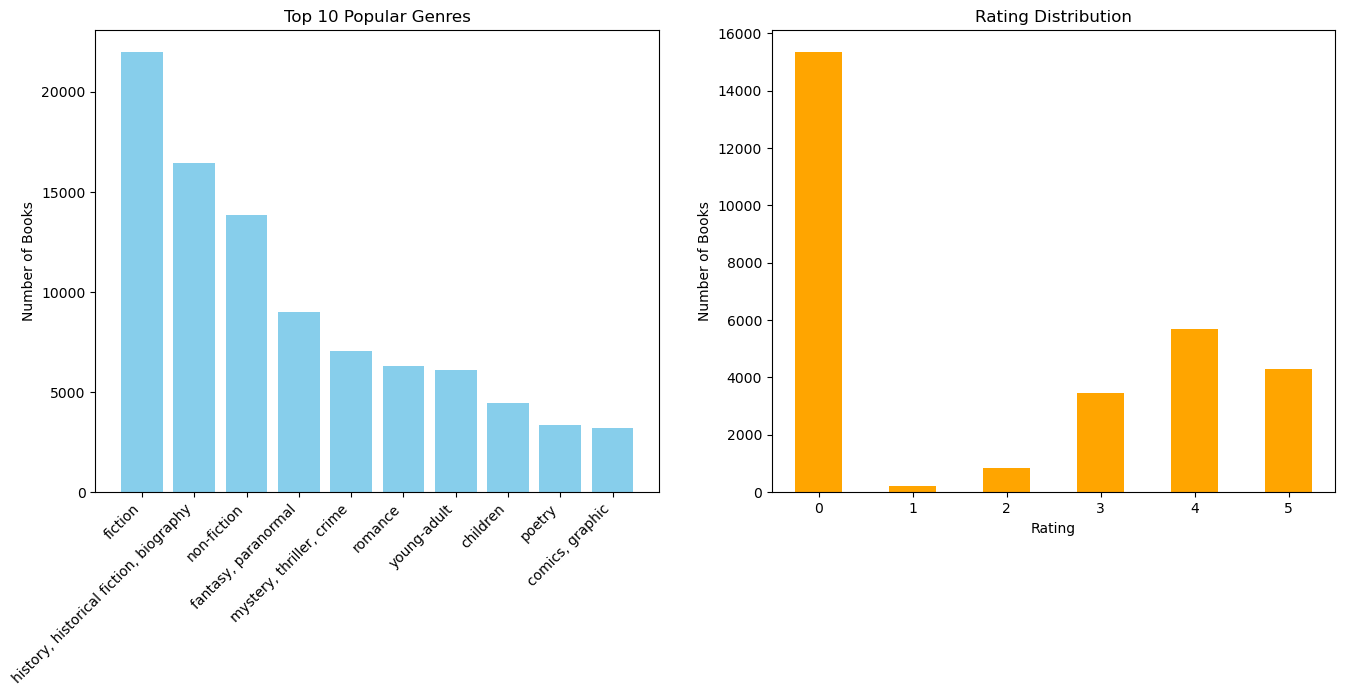

In [12]:
genre_counts = {}
for genres in df['genres_lst']:
    for genre in genres:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

top_genres = sorted_genres[:10]
genres, counts = zip(*top_genres)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.bar(genres, counts, color='skyblue')
plt.title('Top 10 Popular Genres')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Books')

plt.subplot(1, 2, 2)
df['rating'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Books')
plt.xticks(rotation=0)

plt.show()

## Feature Selection

In [13]:
# One-hot encode the genres_lst columns (total unique 10 genres)
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(merged_df['genres_lst'])
genres_encoded

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [14]:
# create df with encoded genres 
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)
genres_df['ident'] = [i for i in range((genres_df).shape[0])]
genres_df.head()

,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult,ident
0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,1,0,1,0,1,0,1
2,0,0,0,1,1,0,1,0,1,0,2
3,0,0,0,1,0,1,0,0,0,0,3
4,0,0,0,1,1,0,1,0,0,0,4


In [15]:
# create df with only useful features 
only_users = merged_df[['user_id', 'is_read', 'rating']]
only_users['ident'] = [i for i in range((only_users).shape[0])]


/var/folders/hd/37zvr6vd2fv5f0byw10jzdk80000gn/T/ipykernel_85511/3880962739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_users['ident'] = [i for i in range((only_users).shape[0])]


In [16]:
# contains user and books info 
user_genres = only_users.merge(genres_df, how = 'right', left_on = 'ident', right_on = 'ident')
user_genres = user_genres.drop(['ident'], axis = 1)
user_genres.head()

,user_id,is_read,rating,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult
0,0,1,5,1,0,0,0,0,0,1,0,0,0
1,0,1,4,0,0,0,1,1,0,1,0,1,0
2,0,1,5,0,0,0,1,1,0,1,0,1,0
3,0,1,5,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,1,1,0,1,0,0,0


In [17]:
# contains unique users with normalized genres, mean of rating, sum of is_reading over all the books they read 
user_df = user_genres.groupby('user_id').agg({**{'rating': 'mean', 
                                                      'is_read': 'sum'},
                                                   **{genre: 'sum' for genre in mlb.classes_}})

row_sums = user_df[mlb.classes_].sum(axis=1)
user_df[mlb.classes_] = user_df[mlb.classes_].div(row_sums, axis=0)
user_df = user_df.drop(['is_read'], axis = 1)
user_df = user_df.drop(['rating'], axis = 1)
user_df.head()

,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult
user_id,,,,,,,,,,
0,0.036364,0.027273,0.079545,0.259091,0.197727,0.072727,0.190909,0.025000,0.056818,0.054545
1,0.000000,0.000000,0.073171,0.146341,0.170732,0.146341,0.317073,0.000000,0.121951,0.024390
2,0.050000,0.083333,0.033333,0.216667,0.200000,0.033333,0.300000,0.033333,0.033333,0.016667
3,0.011494,0.000000,0.120690,0.229885,0.224138,0.028736,0.149425,0.126437,0.063218,0.045977
4,0.000000,0.000000,0.141732,0.244094,0.220472,0.023622,0.133858,0.188976,0.031496,0.015748


# Proposed Solution

We propose to develop an unsupervised machine learning model to recommend books to users based on their interactions and preferences. We will harness two datasets: `goodreads_book_genres_initial.json`, which contains information on books and their genres, and `goodreads_interactions.csv`, which details user interactions with books, including readings, reviews, and ratings. The proposed model will follow these steps:

1. **Data Preparation**: We will use the top 20,000 rows from `goodreads_interactions.csv`, as these users have read the most books and thus can provide more information for us to train our model. We will also randomly sample 80,000 books from `goodreads_book_genres_initial.json` to ensure a sufficiently large sample. The `rating` and `has_read` fields from `goodreads_interactions.csv` will be dropped. Since we need to use `has_read` for our book recommendation algorithm later, and `rating` to test how effective is our model at the end. The two datasets will then be merged to correlate users' interactions with specific book genres, enabling a comprehensive view of user preferences.

2. **Feature Engineering**: We will focus on the genres of books a user has read to summarize their book preferences.We belive the genres feature can capture the user preference for books since users tend to prefer certain genres depending ontheir personalities or experiences, and they tend to keep this preference for genres for long term.The aggregated data will be normalized to ensure uniformity and facilitate meaningful comparison between users.

3. **Clustering with K-Means**: K-Means clustering will be implemented to group users based on their normalized interaction profiles. The initial number of clusters (k) will be chosen based on domain knowledge and refined using silhouette analysis to ensure optimal cluster quality.

4. **Book Recommendations**: Books will be recommended to users based on cluster membership. A book read by one user in a cluster can be recommended to another user in the same cluster who has not yet interacted with that book.

5. **Implementation Details**: We plan to use Python for implementation, utilizing libraries such as Pandas for data manipulation, Scikit-learn for K-Means clustering and silhouette analysis, and NumPy for numerical operations. Code reproducibility will be ensured by using our class conda environment and providing step-by-step execution instructions.

## Testing the Solution

To test our solution, we will focus on the ratings provided by users to assess the effectiveness of our recommendations. Specifically, we will evaluate whether users within the same cluster tend to give higher ratings to books that are commonly read and appreciated within their cluster. This approach presupposes that effective recommendations should align with users' existing preferences, as indicated by their ratings. The testing strategy will involve:

1. **Rating Analysis within Clusters**: We will calculate the average rating for books within each cluster that are recommended based on shared interests. This will involve comparing the average ratings of recommended books to a baseline to assess the quality of recommendations.

2. **Cross-Validation**: A form of cross-validation tailored for unsupervised learning will be implemented, where a portion of user interactions is held out from the clustering process. We will predict their ratings for unseen books based on cluster averages. These predicted ratings will then be compared to the actual ratings to measure accuracy.


3. **Benchmarking**: As a benchmark, we will use a simple popularity-based recommendation system, where the most popular books across the entire dataset are recommended to every user. The performance of our unsupervised model will be compared against this benchmark to demonstrate its effectiveness in providing personalized recommendations.


In [18]:
#imports
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import umap
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler


## K-means cluster

In [19]:
# create and fit kmeans 
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(user_df)

/Users/cassidylu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

In [20]:
# add label in clusters
user_df['k_means_cluster'] = kmeans.labels_

In [21]:
# eval matrix
silhouette_avg = silhouette_score(user_df, kmeans.labels_)
silhouette_avg

0.9079045762494311

### silhouette illustration for k-means

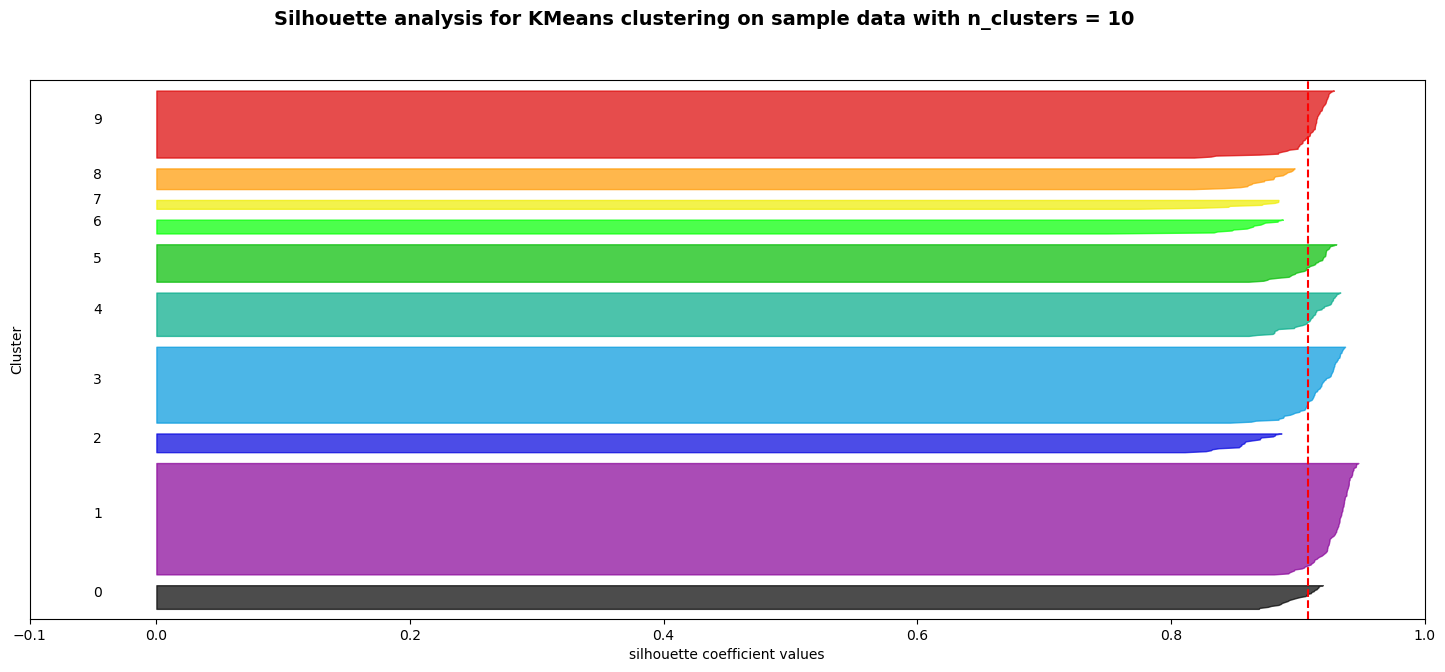

In [22]:
# graph silhouette
silhouette_avg = silhouette_score(user_df, kmeans.labels_)
sample_silhouette_values = silhouette_samples(user_df, kmeans.labels_)

# Create a subplot with 1 row and 2 columns
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

cluster_n = 10
ax1.set_xlim([-0.1, 1])
# The (5+1)*10 is for inserting blank space between silhouette
ax1.set_ylim([0, len(user_df) + (cluster_n + 1) * 10])

y_lower = 10

#5 clusters
for i in range(cluster_n):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / cluster_n)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  


ax1.set_xlabel("silhouette coefficient values")
ax1.set_ylabel("Cluster")

# Vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# Clear the yaxis labels
ax1.set_yticks([])  
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Display the silhouette plot
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              f'with n_clusters = {cluster_n}'),
             fontsize=14, fontweight='bold')

plt.show()

### PCA analysis for k-means

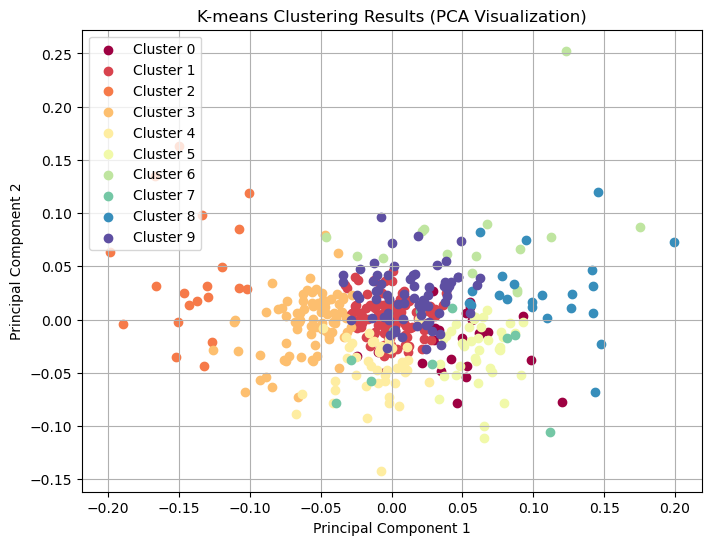

In [23]:
# Extract data points and cluster assignments
data_points = user_df.drop('k_means_cluster', axis=1).values
cluster_labels = user_df['k_means_cluster'].values

# Number of unique clusters
unique_clusters = np.unique(cluster_labels)

# Run PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_points)

# Define colors for plotting
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_clusters))]

# Plot data points in the reduced space colored by their K-means cluster assignments
plt.figure(figsize=(8, 6))
for i, cluster_label in enumerate(unique_clusters):
    color = colors[i]
    cluster_points = pca_result[cluster_labels == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=f'Cluster {int(cluster_label)}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results (PCA Visualization)')
plt.legend()
plt.grid(True)
plt.show()


## Gaussian Mixture Model 

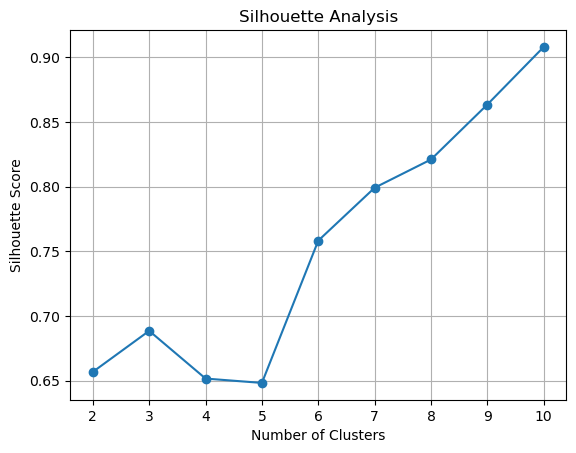

[0.6568289876609938, 0.6885543148887644, 0.65168711032684, 0.6483118051825385, 0.7582536477123333, 0.799104578524097, 0.8209395867905896, 0.8634173750104963, 0.9079045762494311]


In [24]:
# Initialize a list to store silhouette scores for different numbers of clusters
# Search thought the different number of culsters
silhouette_scores = []

# Define a range of cluster numbers to try
min_clusters = 2
max_clusters = 10  

for n_clusters in range(min_clusters, max_clusters+1):
    # Initialize and fit the GMM model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    cluster_labels = gmm.fit_predict(user_df)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(user_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.xticks(np.arange(min_clusters, max_clusters+1, 1))
plt.grid(True)
plt.show()
print(silhouette_scores)

In [25]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(user_df)

# Reduce dimensionality with PCA
pca = PCA(n_components=10)
pca_features = pca.fit_transform(scaled_features)

# Initialize the GMM model
num_clusters = 10  
gmm = GaussianMixture(n_components=num_clusters, random_state=42)


gmm.fit(pca_features)
cluster_labels = gmm.predict(pca_features)
user_df['GMM_cluster'] = cluster_labels



### silhouette score for GMM

In [26]:
silhouette_avg = silhouette_score(user_df, cluster_labels)
silhouette_avg

0.7456639009109439

### PCA for GMM

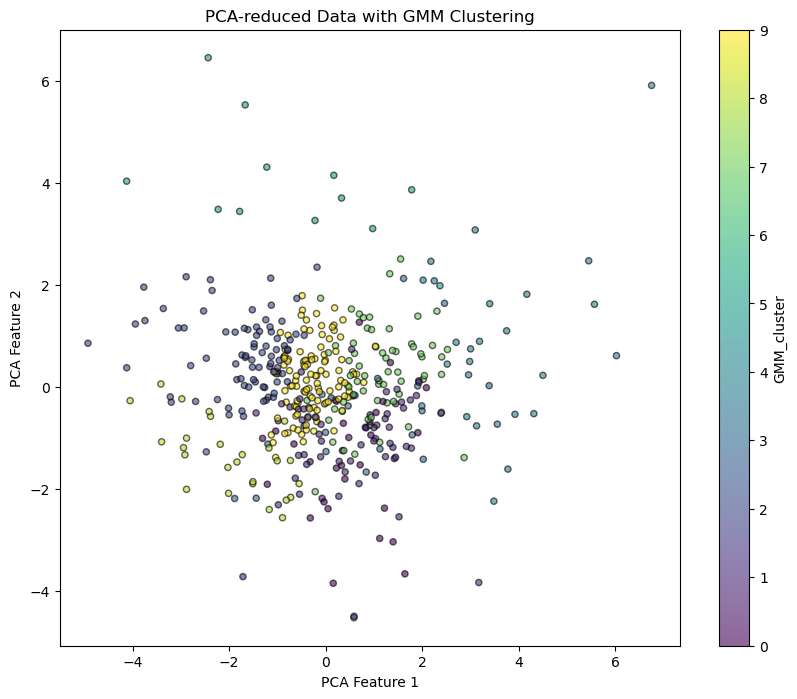

In [27]:
# Analyzing the clusters
# Distribution of users in each cluster
cluster_distribution = user_df['GMM_cluster'].value_counts()

# Visualize the PCA-reduced data colored by GMM cluster assignment
plt.figure(figsize=(10, 8))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis', 
            marker='o', edgecolor='k', s=20, alpha=0.6)
plt.title('PCA-reduced Data with GMM Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='GMM_cluster')
plt.show()

## Hierarchical clustering

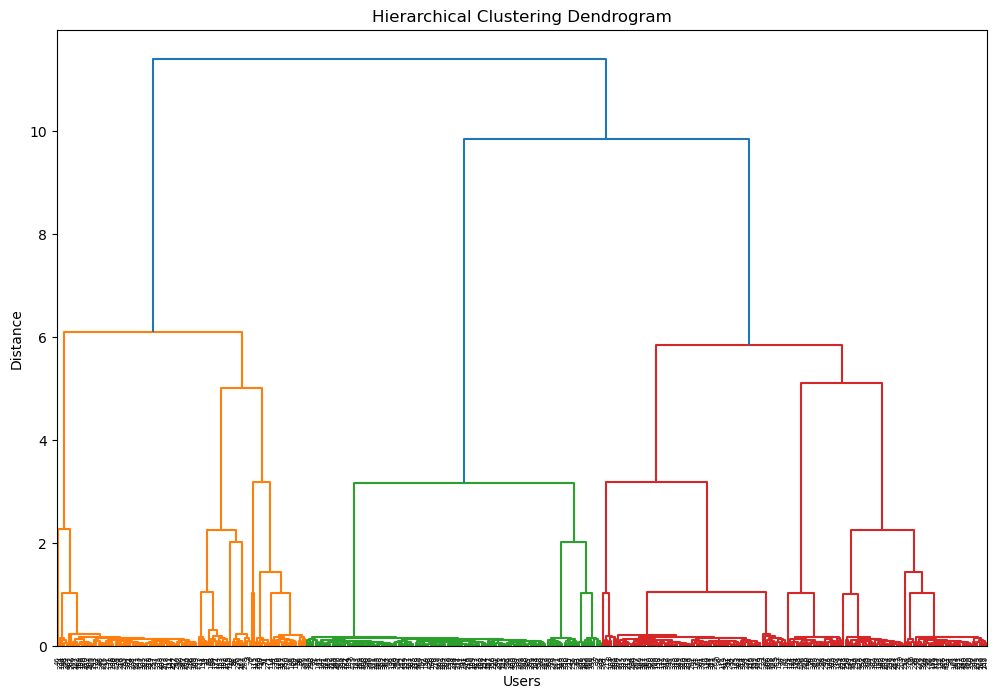

In [28]:
linkage_matrix = linkage(user_df, method='complete', metric='euclidean')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Users')
plt.ylabel('Distance')
plt.show()

### silhouette score for Hierarchical

In [29]:
num_clusters = 10
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Compute the silhouette score
silhouette_avg = silhouette_score(user_df, cluster_labels)
silhouette_avg

0.8256559165340861

### PCA for Hierarchical

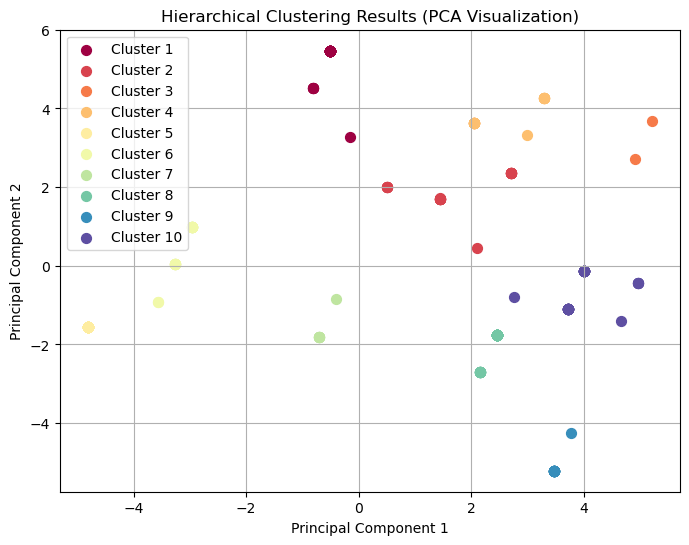

In [30]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(user_df)

# Plotting
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, num_clusters)]

plt.figure(figsize=(8, 6))
for i in range(1, num_clusters+1):
   
    cluster_points = pca_result[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=[colors[i-1]], label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering Results (PCA Visualization)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation Metrics

The evaluation metric that we propose to quantify the performance of both the benchmark and solution models is the **Cluster-Based Rating Consistency (CBRC)**. This metric assesses the homogeneity of ratings within clusters and the alignment of recommendations with users' preferences.

**Mathematical Representation**:
$$
\text{CBRC} = \frac{1}{N_c} \sum_{i=1}^{N_c} \left( \frac{\sum_{j \in C_i} (r_j - \bar{r}_{C_i})^2}{|C_i|} \right)
$$
where:
- $N_c$ is the number of clusters,
- $C_i$ is the set of books recommended to the $i$th cluster,
- $r_j$ is the rating given to the $j$th book within cluster $C_i$,
- $bar{r}_{C_i}$ is the average rating of books within cluster $C_i$,
- $|C_i|$ is the number of books in cluster $C_i$.

The CBRC metric will allow us to evaluate the consistency of recommendations across the user clusters, with lower values indicating higher consistency and alignment with user preferences. By comparing the CBRC scores of the benchmark model and our solution model, we can quantitatively determine which model provides more relevant and personalized recommendations.

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



Given the dataset's blend of user interactions (like reading status and reviews) and book characteristics (such as genres), K-Means Clustering and Hierarchical Clustering emerge as strong candidates for segmenting users or books based on their preferences, potentially enhancing personalized book recommendations. However, the standout method is Association Rule Mining, particularly adept at leveraging the dataset's rich genre data and binary interaction features. This technique can reveal intricate patterns, such as the correlation between reading and rating behaviors across different genres, offering a robust foundation for crafting tailored book suggestions that align closely with user interests.

The silhouette score ranges from -0.1 to 1, where a high score indicates that the clusters are well apart from each other and clearly defined.
Most of the clusters seem to have silhouette scores greater than the average score (indicated by the red dashed line), which suggests that, for the most part, the dataset is relatively well clustered.
However, there are parts of the clusters that dip below the average, indicating that there are some areas where the clustering is not as clear-cut.
The widths of the silhouette plots vary, which might suggest that some clusters have more cohesion than others.

# Discussion

### Interpreting the result

The K-Means clustering appears to have done a reasonable job in segmenting the data into distinct groups based on the user's book preferences and interaction patterns. There's evidence of good separation and cluster formation for the dataset, which could be used to recommend books from the most representative genres of each cluster to similar users. However, the variations in silhouette scores within clusters indicate that there might be room for improving the clustering, potentially by tuning the number of clusters or by further feature engineering and preprocessing. It might also be beneficial to explore other clustering algorithms that can handle more complex cluster shapes or consider a dimensionality reduction technique before clustering to potentially improve the results.


### Limitations

The dataset currently used in our project comprises solely user IDs and their corresponding ebook shelves, which significantly restricts the depth of information available for analysis. This omission of detailed user feedback, such as rating scores for each book, poses a challenge to accurately depicting users' reading preferences. Such a limitation is consequential, as it might not only lead to a less precise recommendation system but also potentially introduce biases. These biases arise from an over-reliance on genre categorization as the primary means of understanding user preferences. While genre is a useful indicator of interest, it is insufficient to capture the full spectrum of factors that influence reading choices. User preferences can be deeply influenced by aspects beyond genre, including the quality of storytelling, the author's reputation, thematic depth, and emotional resonance of the books. Consequently, the absence of these nuanced data points may result in a recommendation system that does not fully reflect the diverse tastes and interests of the user base.

### Ethics & Privacy

In addition to the technical and practical limitations, there are significant ethical and privacy concerns associated with the project. One of the primary concerns is the perception of intrusiveness or surveillance that users might feel as a result of their ebook shelf information being used for recommendation purposes. The delicate balance between personalization and privacy is a critical consideration for any recommendation system. In response to these ethical concerns, our team is committed to implementing rigorous ethical practices throughout the lifecycle of the project. Key to this commitment is the principle of transparency. We intend to openly communicate both the capabilities and limitations of our recommendation system, including the potential biases inherent in the dataset and our efforts to mitigate them. Additionally, recognizing the importance of minimizing biases, we are exploring avenues to enrich our dataset with more relevant and comprehensive data points that better reflect the complexity of reading preferences and behavior. Equally important is our commitment to respecting user privacy and autonomy. This involves not only adhering to best practices in data handling and privacy protection but also ensuring that our recommendation system provides value in a manner that is respectful and considerate of user sensitivities. By proactively addressing these ethical considerations, we aim to build a recommendation system that is not only effective and efficient but also ethically responsible, thereby fostering greater trust and satisfaction among users.

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
